In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&lat={lat}&lon={lon}&appid=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | faya
Processing Record 4 of Set 1 | lincoln
Processing Record 5 of Set 1 | casambalangan
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | mendahara
City not found. Skipping...
Processing Record 10 of Set 1 | cap-aux-meules
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | nainpur
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | north platte
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | khani
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | vung tau
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | matara
Processing Record 40 of Set 4 | beaverlodge
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | wahran
City not found. Skipping...
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | saint john
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | hvolsvollur
Processing Record 47 of Set 4 | san andres
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | nurota
Processing Record 1 of Set 5 | kudahuvadhoo
Processing Record 2 of Set 5 | alugan
Processing Record 3 of Set 5 | yambio
Processing Record 4 of Set 5 | mabaruma
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | hobyo
P

Processing Record 27 of Set 8 | sarangani
Processing Record 28 of Set 8 | barra do garcas
Processing Record 29 of Set 8 | port augusta
Processing Record 30 of Set 8 | makubetsu
Processing Record 31 of Set 8 | palaikastron
Processing Record 32 of Set 8 | islampur
Processing Record 33 of Set 8 | aripuana
Processing Record 34 of Set 8 | andselv
City not found. Skipping...
Processing Record 35 of Set 8 | sabang
Processing Record 36 of Set 8 | bengkulu
Processing Record 37 of Set 8 | sibi
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | torbay
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | ranghulu
Processing Record 42 of Set 8 | hakvik
City not found. Skipping...
Processing Record 43 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 8 | provideniya
Processing Record 45 of Set 8 | svetlogorsk
Processing Record 46 of Set 8 | san jose de buan
Processing Record 47 of Set 8 | trinidad
Processing Record 48 of Set 8 | a

Processing Record 17 of Set 12 | elmira
Processing Record 18 of Set 12 | manuk mangkaw
Processing Record 19 of Set 12 | payakumbuh
Processing Record 20 of Set 12 | bolivar
Processing Record 21 of Set 12 | kontagora
Processing Record 22 of Set 12 | chitrakonda
Processing Record 23 of Set 12 | phan thiet
Processing Record 24 of Set 12 | lewistown
Processing Record 25 of Set 12 | nylstroom
City not found. Skipping...
Processing Record 26 of Set 12 | nanortalik
Processing Record 27 of Set 12 | moose factory
Processing Record 28 of Set 12 | frascati
Processing Record 29 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 30 of Set 12 | sistranda
Processing Record 31 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | akyab
Processing Record 34 of Set 12 | sarakhs
Processing Record 35 of Set 12 | datong
Processing Record 36 of Set 12 | sao desiderio
Processing Record 37 of Set 12 | puerto colombia


In [14]:
len(city_data)

554

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,35.62,93,100,26.46,US,2022-09-13 15:25:36
1,Caravelas,-17.7125,-39.2481,81.95,51,6,10.18,BR,2022-09-13 15:30:06
2,Faya,18.3851,42.4509,82.51,55,77,8.19,SA,2022-09-13 15:30:06
3,Lincoln,40.8000,-96.6670,77.14,59,0,4.61,US,2022-09-13 15:28:06
4,Casambalangan,18.3765,122.1274,79.38,81,73,2.64,PH,2022-09-13 15:30:07
5,Mar Del Plata,-38.0023,-57.5575,64.42,76,0,10.00,AR,2022-09-13 15:30:08
6,New Norfolk,-42.7826,147.0587,40.71,73,47,2.44,AU,2022-09-13 15:30:08
7,Bredasdorp,-34.5322,20.0403,60.19,69,0,9.71,ZA,2022-09-13 15:30:09
8,Cap-Aux-Meules,47.3821,-61.8597,68.05,77,75,5.75,CA,2022-09-13 15:30:09
9,Arraial Do Cabo,-22.9661,-42.0278,82.36,78,40,11.50,BR,2022-09-13 15:30:10


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-09-13 15:25:36,71.2906,-156.7887,35.62,93,100,26.46
1,Caravelas,BR,2022-09-13 15:30:06,-17.7125,-39.2481,81.95,51,6,10.18
2,Faya,SA,2022-09-13 15:30:06,18.3851,42.4509,82.51,55,77,8.19
3,Lincoln,US,2022-09-13 15:28:06,40.8000,-96.6670,77.14,59,0,4.61
4,Casambalangan,PH,2022-09-13 15:30:07,18.3765,122.1274,79.38,81,73,2.64
...,...,...,...,...,...,...,...,...,...
549,Luce,FR,2022-09-13 15:44:26,48.4369,1.4636,81.01,61,99,3.00
550,Bereda,ES,2022-09-13 15:44:26,43.2686,-7.5406,72.41,82,100,7.05
551,Payson,US,2022-09-13 15:44:26,40.0444,-111.7321,70.56,61,100,3.00
552,Tiffin,US,2022-09-13 15:42:46,41.1145,-83.1780,64.58,84,49,9.78


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

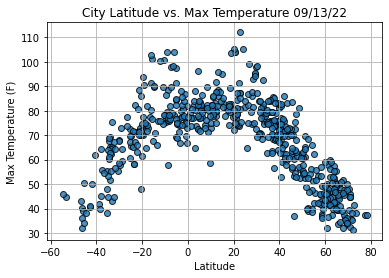

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

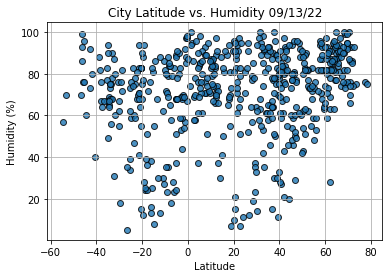

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

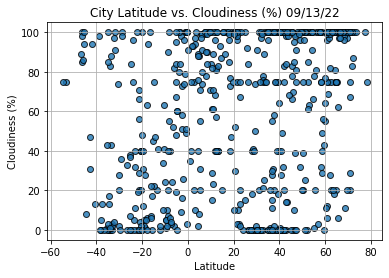

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

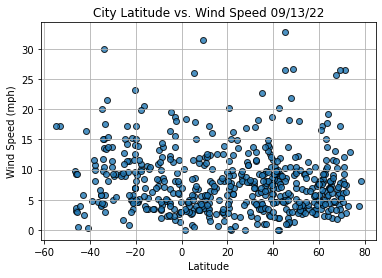

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-09-13 15:25:36,71.2906,-156.7887,35.62,93,100,26.46
1,Caravelas,BR,2022-09-13 15:30:06,-17.7125,-39.2481,81.95,51,6,10.18
2,Faya,SA,2022-09-13 15:30:06,18.3851,42.4509,82.51,55,77,8.19
3,Lincoln,US,2022-09-13 15:28:06,40.8000,-96.6670,77.14,59,0,4.61
4,Casambalangan,PH,2022-09-13 15:30:07,18.3765,122.1274,79.38,81,73,2.64
5,Mar Del Plata,AR,2022-09-13 15:30:08,-38.0023,-57.5575,64.42,76,0,10.00
6,New Norfolk,AU,2022-09-13 15:30:08,-42.7826,147.0587,40.71,73,47,2.44
7,Bredasdorp,ZA,2022-09-13 15:30:09,-34.5322,20.0403,60.19,69,0,9.71
8,Cap-Aux-Meules,CA,2022-09-13 15:30:09,47.3821,-61.8597,68.05,77,75,5.75
9,Arraial Do Cabo,BR,2022-09-13 15:30:10,-22.9661,-42.0278,82.36,78,40,11.50


In [28]:
index13 = city_data_df.loc[13]

In [29]:
index13

City                  Pangnirtung
Country                        CA
Date          2022-09-13 15:30:11
Lat                       66.1451
Lng                      -65.7125
Max Temp                     50.0
Humidity                       81
Cloudiness                    100
Wind Speed                   4.61
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
549     True
550     True
551     True
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-09-13 15:25:36,71.2906,-156.7887,35.62,93,100,26.46
2,Faya,SA,2022-09-13 15:30:06,18.3851,42.4509,82.51,55,77,8.19
3,Lincoln,US,2022-09-13 15:28:06,40.8000,-96.6670,77.14,59,0,4.61
4,Casambalangan,PH,2022-09-13 15:30:07,18.3765,122.1274,79.38,81,73,2.64
8,Cap-Aux-Meules,CA,2022-09-13 15:30:09,47.3821,-61.8597,68.05,77,75,5.75
...,...,...,...,...,...,...,...,...,...
548,Worland,US,2022-09-13 15:44:25,44.0169,-107.9554,72.75,20,68,8.86
549,Luce,FR,2022-09-13 15:44:26,48.4369,1.4636,81.01,61,99,3.00
550,Bereda,ES,2022-09-13 15:44:26,43.2686,-7.5406,72.41,82,100,7.05
551,Payson,US,2022-09-13 15:44:26,40.0444,-111.7321,70.56,61,100,3.00


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

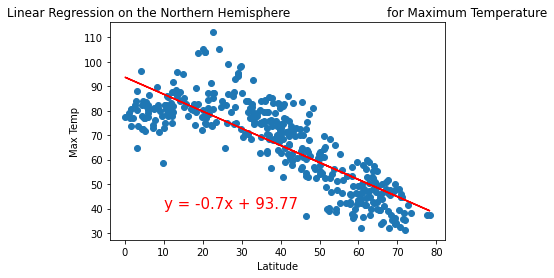

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

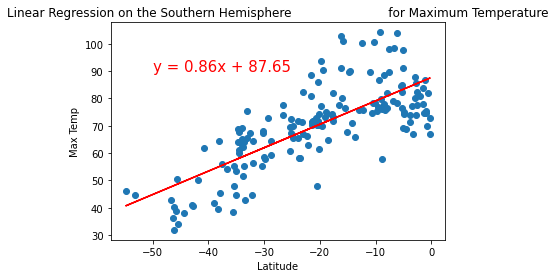

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

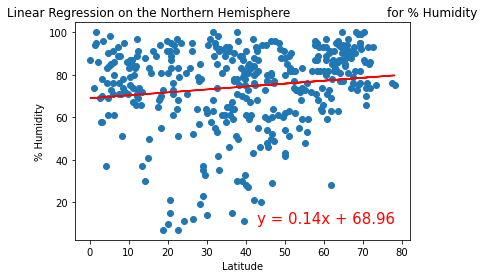

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(43,10))

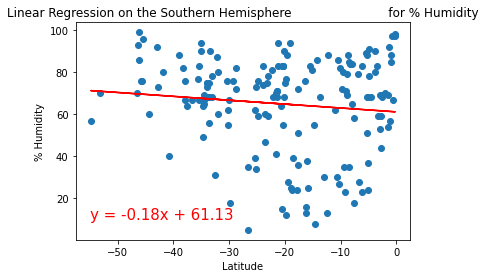

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,10))

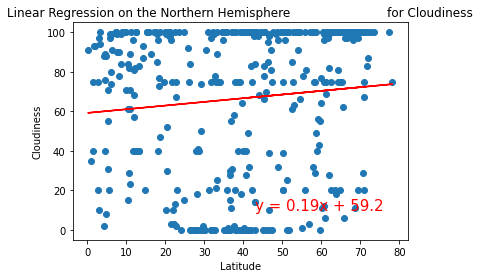

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(43,10))

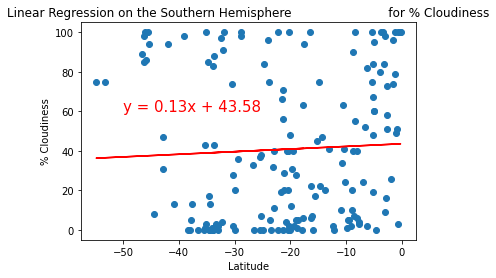

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

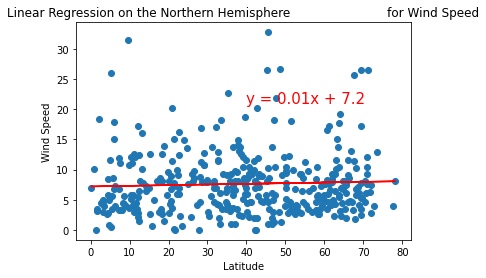

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,21))

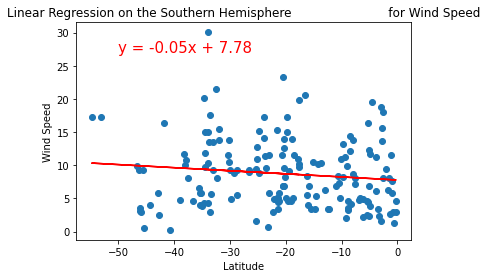

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,27))